In [52]:
import joblib

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

utility function

In [ ]:
from utils import clean_text

load data


In [35]:
movie = pd.read_csv('imdb_labelled.txt', delimiter = '\t', names=["reviews", "rating"])
movie.head(4)

,reviews,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0


In [36]:
movie['labels'] = movie["rating"].apply(lambda x: "Positive" if x else "Negative")
movie.head(4)

,reviews,rating,labels
0,"A very, very, very slow-moving, aimless movie ...",0,Negative
1,Not sure who was more lost - the flat characte...,0,Negative
2,Attempting artiness with black & white and cle...,0,Negative
3,Very little music or anything to speak of.,0,Negative


In [38]:
movie.isna().sum()

reviews    0
rating     0
labels     0
dtype: int64

Positive    386
Negative    362
Name: labels, dtype: int64



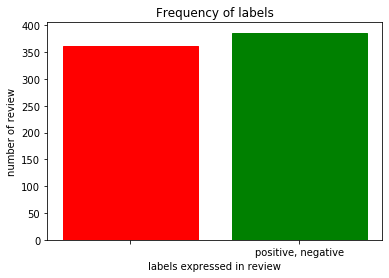

In [41]:
index = [1, 0]

print(movie['labels'].value_counts())
print()

barlist = plt.bar(index, movie['labels'].value_counts())

plt.title('Frequency of labels')
plt.xticks(index, ['positive, negative'])
plt.ylabel('number of review')
plt.xlabel('labels expressed in review')

barlist[index[1]].set_color('green')
barlist[index[0]].set_color('red')
plt.show()

In [ ]:
movie['clean_review'] = movie['reviews'].apply(clean_text)

In [42]:
movie['length'] = movie['reviews'].apply(lambda x: len(str(x).split(' ')))
movie.head(4)

,reviews,rating,labels,length
0,"A very, very, very slow-moving, aimless movie ...",0,Negative,15
1,Not sure who was more lost - the flat characte...,0,Negative,21
2,Attempting artiness with black & white and cle...,0,Negative,33
3,Very little music or anything to speak of.,0,Negative,10


In [23]:
movie['length'].unique()

array([  15,   21,   33,   10,   23,   22,    5,   17,   12,    8,   13,
          6,   18,   25,   19,  868,   14,   16,    9,    7,   26,   35,
         11,    4,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800])

<BarContainer object of 55 artists>

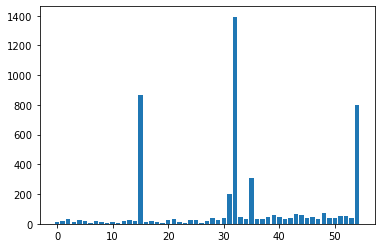

In [24]:
unique_lengths = movie['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)

In [43]:
X = movie['reviews']
y = movie['rating']

In [44]:
token, X_test, y_train, y_test = train_test_split(X,y, test_size = .40, random_state = 60)

In [45]:
token.shape, token.to_list()[:4]

((448,),
 ['I am so tired of clichés that is just lazy writing, and here they come in thick and fast.  ',
  'Nothing short of magnificent photography/cinematography in this film.  ',
  'The acting was bad, the dialogs were extremely shallow and insincere.  ',
  "The soundtrack wasn't terrible, either.  "])

In [46]:
cv_NB = CountVectorizer(stop_words = 'english').fit(token)

X_train_transform = vectorizer.transform(token).toarray()
X_test_transform = vectorizer.transform(X_test).toarray()

print("X_test_transform shape = ", X_test_transform.shape)
print("X_train_transform shape = ", X_train_transform.shape)

X_test_transform shape =  (300, 1888)
X_train_transform shape =  (448, 1888)


In [47]:
nb = GaussianNB()
nb.fit(X_train_transform, y_train)

GaussianNB()

In [ ]:
joblib.dump(cv_NB, "models/gaussian_naive_baye_wuth_count_Vectorizer.joblib")

In [48]:
train_accuracy = nb.score(X_train_transform, y_train)
print(f"Training accuracy is {train_accuracy*100:.2f}%")

Training accuracy is 95.76%


In [49]:
test_accuracy = nb.score(X_test_transform, y_test)

print(f"Testing accuracy is {test_accuracy*100:.2f}%")

Testing accuracy is 70.00%


In [50]:
from sklearn.metrics import classification_report

y_predicted = nb.predict(X_test_transform)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       155
           1       0.73      0.60      0.66       145

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



Training with Tfidf vectorizer

In [65]:
tfidf_NB = TfidfVectorizer(stop_words = 'english').fit(token)

X_train_transform = vectorizer.transform(token).toarray()
X_test_transform = vectorizer.transform(X_test).toarray()

print("X_test_transform shape = ", X_test_transform.shape)
print("X_train_transform shape = ", X_train_transform.shape)

X_test_transform shape =  (300, 1888)
X_train_transform shape =  (448, 1888)


In [66]:
nb = GaussianNB()
nb.fit(X_train_transform, y_train)

GaussianNB()

In [61]:
joblib.dump(tfidf_NB, "models/gaussian_naive_baye_wuth_tfidf_Vectorizer.joblib")

In [67]:
train_accuracy = nb.score(X_train_transform, y_train)
print(f"Training accuracy is {train_accuracy*100:.2f}%")

Training accuracy is 95.76%


In [68]:
test_accuracy = nb.score(X_test_transform, y_test)

print(f"Testing accuracy is {test_accuracy*100:.2f}%")

Testing accuracy is 70.00%


In [69]:
from sklearn.metrics import classification_report

y_predicted = nb.predict(X_test_transform)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       155
           1       0.73      0.60      0.66       145

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

